# Getting the models to merge in Checkpoint format


In [ ]:
!wget https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix/AbyssOrangeMix_base.ckpt

--2023-08-03 21:56:25--  https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix/AbyssOrangeMix_base.ckpt
Resolving huggingface.co (huggingface.co)... 99.84.108.87, 99.84.108.55, 99.84.108.129, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/a3/2d/a32dc75b6b955f4b9a0498061b68d02fc24b9e596c8126c9817795c3f0356c18/bbd2621f3ec4fad707f75fc032a2c2602c296180a53ed3d9897d8ca7a01dd6ed?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27AbyssOrangeMix_base.ckpt%3B+filename%3D%22AbyssOrangeMix_base.ckpt%22%3B&Expires=1691358985&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MTM1ODk4NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9hMy8yZC9hMzJkYzc1YjZiOTU1ZjRiOWEwNDk4MDYxYjY4ZDAyZmMyNGI5ZTU5NmM4MTI2Yzk4MTc3OTVjM2YwMzU2YzE4L2JiZDI2MjFmM2VjNGZhZDcwN2Y3NWZjMDMyYTJjMj

In [ ]:
!wget https://huggingface.co/hakurei/waifu-diffusion-v1-3/resolve/main/wd-v1-3-float32.ckpt

--2023-08-03 21:58:17--  https://huggingface.co/hakurei/waifu-diffusion-v1-3/resolve/main/wd-v1-3-float32.ckpt
Resolving huggingface.co (huggingface.co)... 99.84.108.55, 99.84.108.87, 99.84.108.129, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/83/8e/838e890bec8fddfdbc93ceb156ced8b290b4de1f1116c58b34d3af4c9f4fcea7/9dade826203c7ee369881b5dc20d34298fa644c1f137568e09fbc4b9a0d3e817?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27wd-v1-3-float32.ckpt%3B+filename%3D%22wd-v1-3-float32.ckpt%22%3B&Expires=1691359097&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MTM1OTA5N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy84My84ZS84MzhlODkwYmVjOGZkZGZkYmM5M2NlYjE1NmNlZDhiMjkwYjRkZTFmMTExNmM1OGIzNGQzYWY0YzlmNGZjZWE3LzlkYWRlODI2MjAzYzdlZTM2OTg4MWI1ZGMyMGQzNDI5OGZhNjQ0YzFmMTM3NTY4ZTA5ZmJjN

# Merging the models

In [ ]:
import os

import torch
from tqdm import tqdm

without_vae = True

output = "merged_model"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



model_0 = torch.load("/content/AbyssOrangeMix_base.ckpt",map_location=torch.device('cuda'))
theta_0 = model_0["state_dict"]
model_1 = torch.load("/content/wd-v1-3-float32.ckpt",map_location=torch.device('cuda'))
theta_1 = model_1
alpha = 0.7

output_file = f'{output}-{str(alpha)[2:] + "0"}.ckpt'

# check if output file already exists, ask to overwrite
if os.path.isfile(output_file):
    print("Output file already exists. Overwrite? (y/n)")
    while True:
        overwrite = input()
        if overwrite == "y":
            break
        elif overwrite == "n":
            print("Exiting...")
            exit()
        else:
            print("Please enter y or n")


for key in tqdm(theta_0.keys(), desc="Stage 1/2"):
    # skip VAE model parameters to get better results(tested for anime models)
    # for anime model，with merging VAE model, the result will be worse (dark and blurry)
    if without_vae and "first_stage_model" in key:
        continue

    if "model" in key and key in theta_1:
        theta_0[key] = (1 - alpha) * theta_0[key] + alpha * theta_1[key]

for key in tqdm(theta_1.keys(), desc="Stage 2/2"):
    if "model" in key and key not in theta_0:
        theta_0[key] = theta_1[key]

print("Saving...")

torch.save({"state_dict": theta_0}, output_file)

print("Done!")

Stage 2/2: 100%|██████████| 7/7 [00:00<00:00, 67185.65it/s]


Saving...
Done!


# Prerequisites for Inference

In [ ]:
torch.cuda.empty_cache()

In [ ]:
! pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
!git clone https://huggingface.co/WarriorMama777/AbyssOrangeMix

Cloning into 'AbyssOrangeMix'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), 516.88 KiB | 8.91 MiB/s, done.
Filtering content: 100% (4/4), 5.10 GiB | 41.87 MiB/s, done.


In [ ]:
!pip install diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00


# Inference test for the 1st Model

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

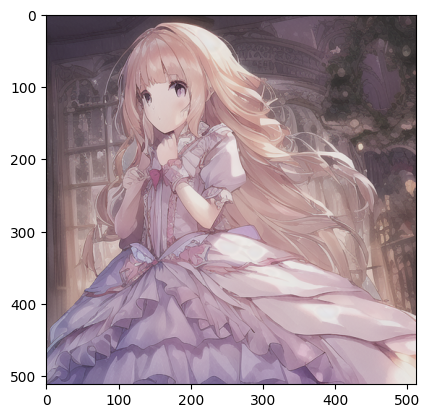

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_path = "/content/AbyssOrangeMix/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe("An image of a girl wearing princess clothes").images[0]
plt.imshow(image)

# Inference test for the 2nd model

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

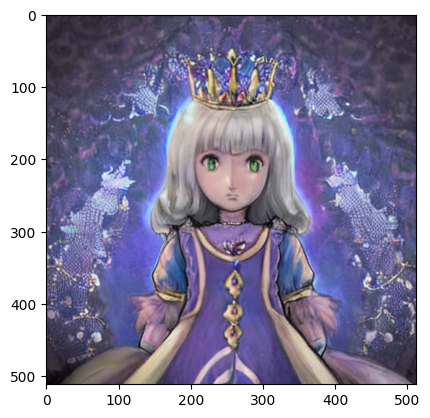

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float32
).to('cuda')


image = pipe("An image of a girl wearing princess clothes").images[0]
plt.imshow(image)

# Converting the merged model from checkpoint to pipeline format

In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 33046, done.
remote: Counting objects: 100% (715/715), done.
remote: Compressing objects: 100% (368/368), done.
remote: Total 33046 (delta 449), reused 498 (delta 303), pack-reused 32331
Receiving objects: 100% (33046/33046), 21.38 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (24249/24249), done.


In [ ]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 965.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144552 sha256=e50a703d5bd49c98e845bef61c2ae67ac910c58c2e35babc2455c6e07b1ae416
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-inference.yaml

--2023-08-03 22:01:21--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-inference.yaml
Resolving huggingface.co (huggingface.co)... 99.84.108.55, 99.84.108.70, 99.84.108.87, ...
Connecting to huggingface.co (huggingface.co)|99.84.108.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1873 (1.8K) [text/plain]
Saving to: ‘v1-inference.yaml’

v1-inference.yaml   100%[===================>]   1.83K  --.-KB/s    in 0s      

2023-08-03 22:01:21 (1.29 GB/s) - ‘v1-inference.yaml’ saved [1873/1873]



In [ ]:
! python diffusers/scripts/convert_original_stable_diffusion_to_diffusers.py --checkpoint_path "/content/merged_model-70.ckpt" --dump_path /content/Merged_Model/ --original_config_file v1-inference.yaml

2023-08-03 22:02:30.737695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


# Inference test for the merged model

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

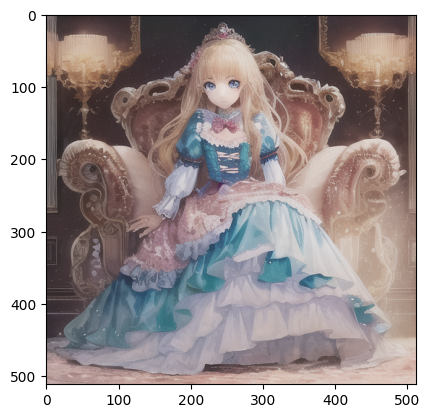

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

model_path = "/content/Merged_Model/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe("An image of a girl wearing princess clothes").images[0]
plt.imshow(image)